In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt




In [3]:
data = pd.read_csv('BITRE_Fatality-Table 1.csv')
data.head()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_2662/1511047806.py:1: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('BITRE_Fatality-Table 1.csv')


Crash ID State  Month  Year Dayweek   Time Crash Type Bus Involvement  \
0  20245021    WA      4  2024  Friday  00:31     Single              No   
1  20245021    WA      4  2024  Friday  00:31     Single              No   
2  20245021    WA      4  2024  Friday  00:31     Single              No   
3  20245021    WA      4  2024  Friday  00:31     Single              No   
4  20243023   Qld      4  2024  Friday  01:00     Single              No   

  Heavy Rigid Truck Involvement Articulated Truck Involvement  ... Age  \
0                            No                            No  ...  19   
1                            No                            No  ...   9   
2                            No                            No  ...  21   
3                            No                            No  ...  45   
4                            No                            No  ...  24   

  National Remoteness Areas SA4 Name 2021  National LGA Name 2021  \
0                       NaN           NaN                     NaN   
1                       NaN           NaN                     NaN   
2                       NaN           NaN                     NaN   
3                       NaN           NaN                     NaN   
4  Outer Regional Australia        Cairns                  Cairns   

  National Road Type Christmas Period Easter Period Age Group Day of week  \
0                NaN               No            No  17_to_25     Weekday   
1                NaN               No            No   0_to_16     Weekday   
2                NaN               No            No  17_to_25     Weekday   
3                NaN               No            No  40_to_64     Weekday   
4         Local Road               No            No  17_to_25     Weekday   

  Time of day  
0       Night  
1       Night  
2       Night  
3       Night  
4       Night  

[5 rows x 23 columns]

00:07:03 - cmdstanpy - INFO - Chain [1] start processing
00:07:03 - cmdstanpy - INFO - Chain [1] done processing
00:07:03 - cmdstanpy - INFO - Chain [1] start processing
00:07:04 - cmdstanpy - INFO - Chain [1] done processing
00:07:04 - cmdstanpy - INFO - Chain [1] start processing
00:07:04 - cmdstanpy - INFO - Chain [1] done processing
00:07:04 - cmdstanpy - INFO - Chain [1] start processing
00:07:04 - cmdstanpy - INFO - Chain [1] done processing
00:07:04 - cmdstanpy - INFO - Chain [1] start processing
00:07:04 - cmdstanpy - INFO - Chain [1] done processing
00:07:04 - cmdstanpy - INFO - Chain [1] start processing
00:07:05 - cmdstanpy - INFO - Chain [1] done processing


Evaluation Metrics for the Test Period (2023) - Age Group:
+65 - MAE: 3.89, MSE: 22.70, MAPE: 15.17%
Forecast vs Actual for first three months of 2024 for +65:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  19.553075    9.381349   29.390623
421 2024-02-01  18.055217    7.836742   28.049415
422 2024-03-01  23.302955   12.999692   33.734703
        Date  Counts
0 2024-01-01      25
1 2024-02-01      17
2 2024-03-01      25

Forecast for +65 in 2030:
            ds       yhat  yhat_lower  yhat_upper
493 2030-01-31  18.397159    8.570104   29.371495
494 2030-02-28  25.852729   15.756899   35.617059
495 2030-03-31  22.699896   13.053820   33.106047
496 2030-04-30  25.009388   14.228496   34.660149
497 2030-05-31  23.505971   13.851954   34.186303
498 2030-06-30  27.666578   17.938935   37.690380
499 2030-07-31  25.838481   15.309350   35.163023
500 2030-08-31  22.220433   12.708556   31.965006
501 2030-09-30  23.104361   12.731154   32.813104
502 2030-10-31  23.487316   1

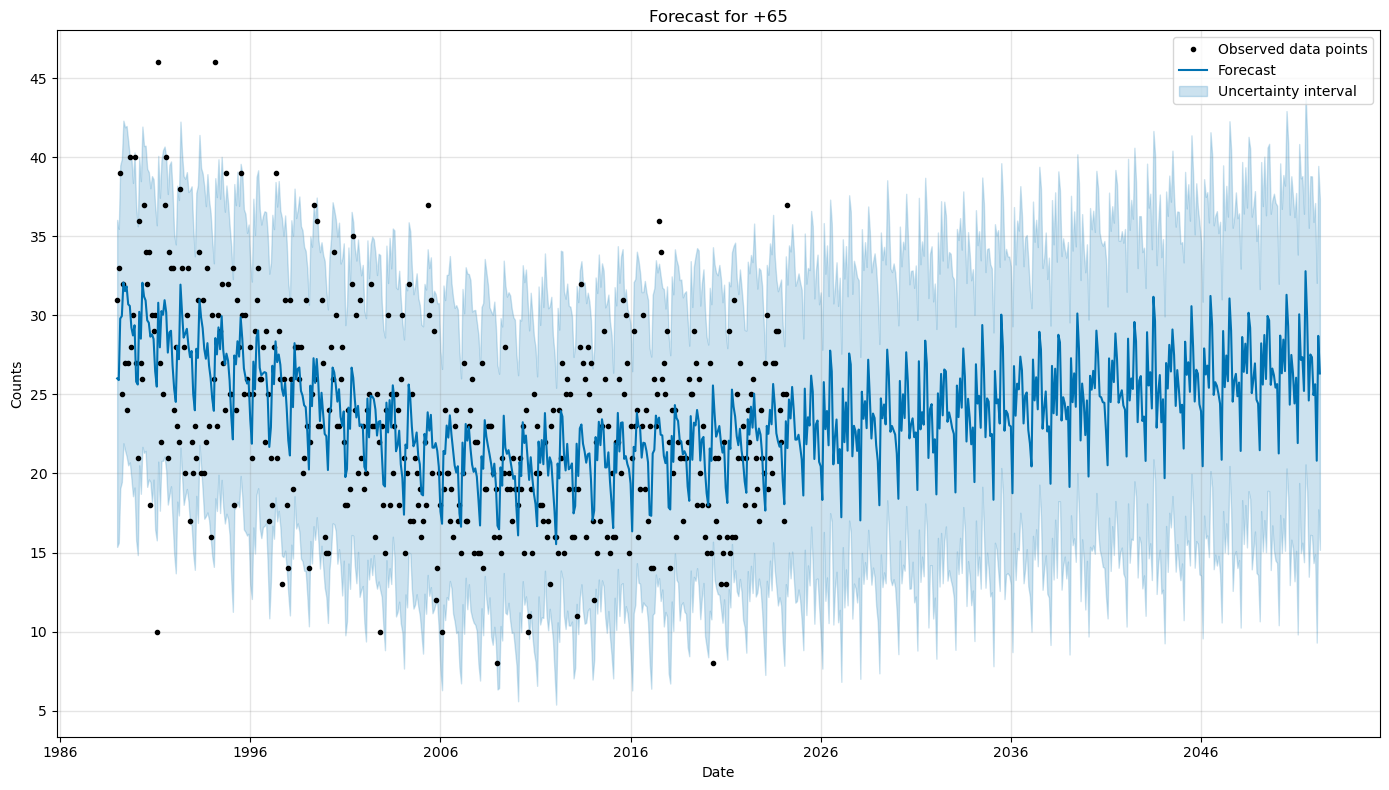

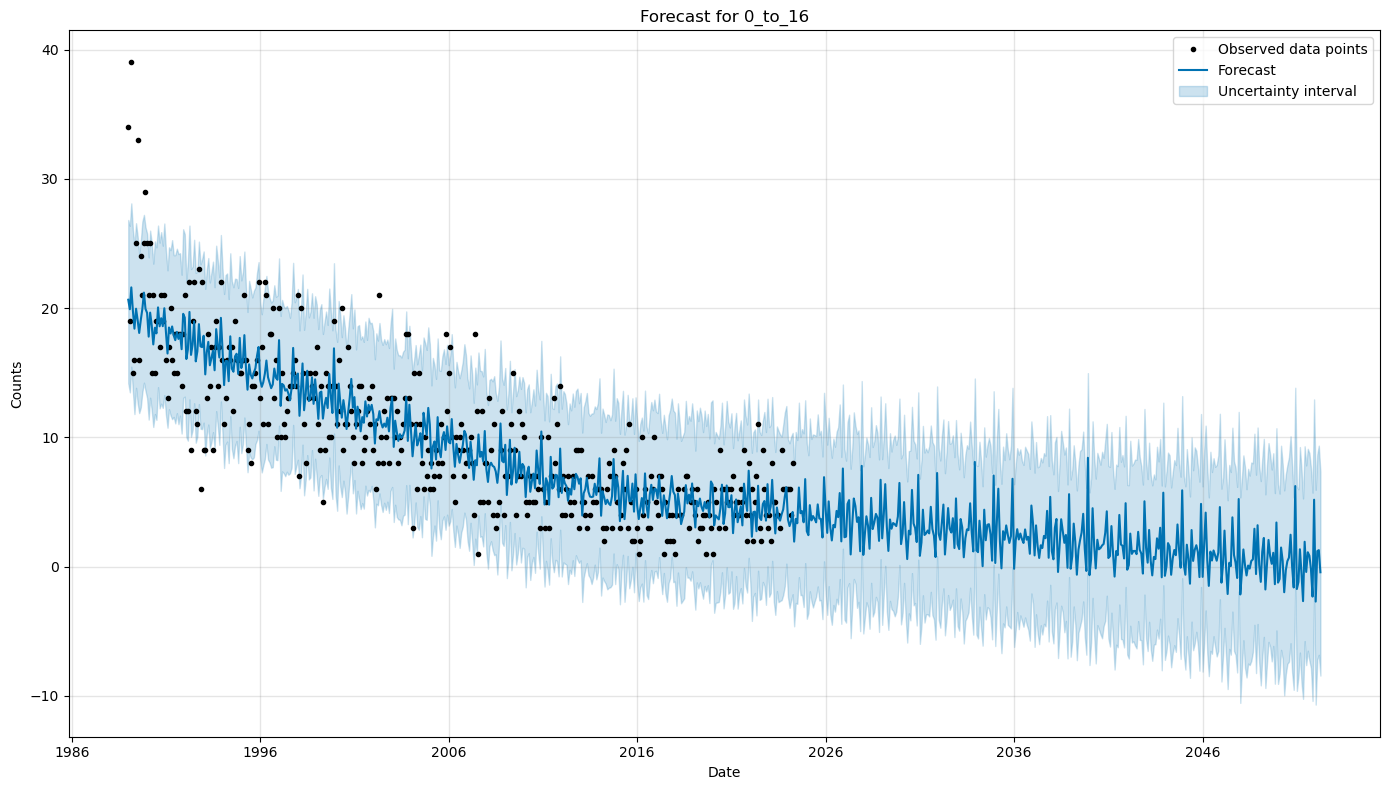

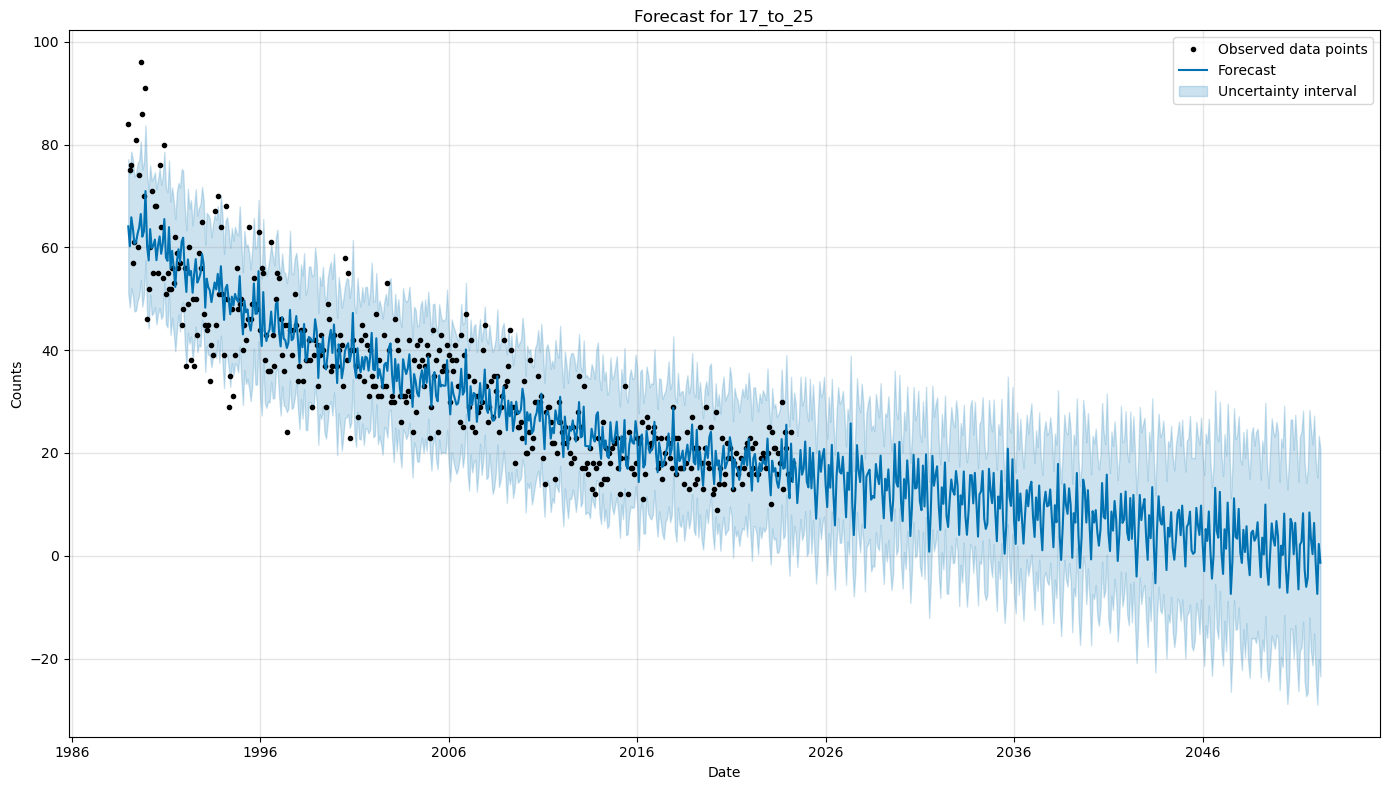

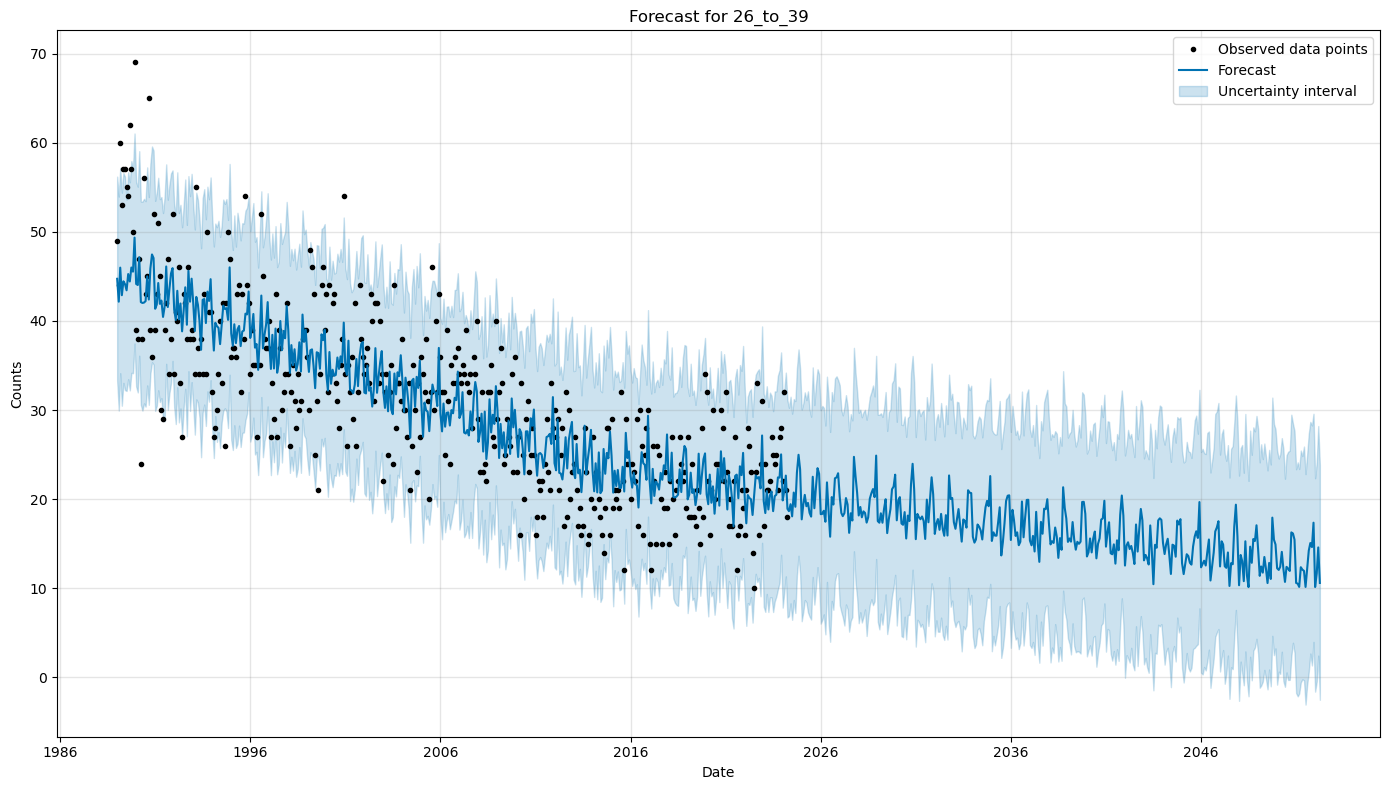

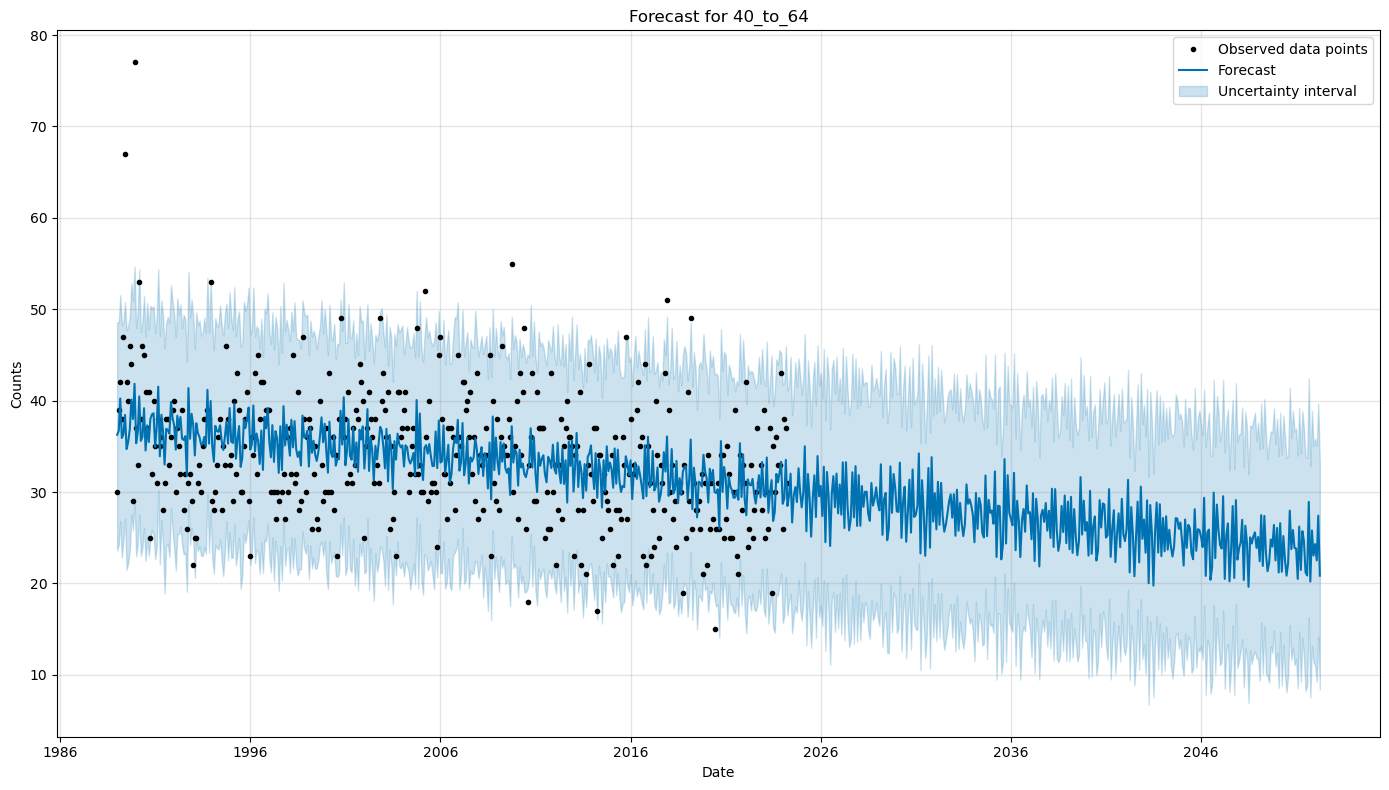

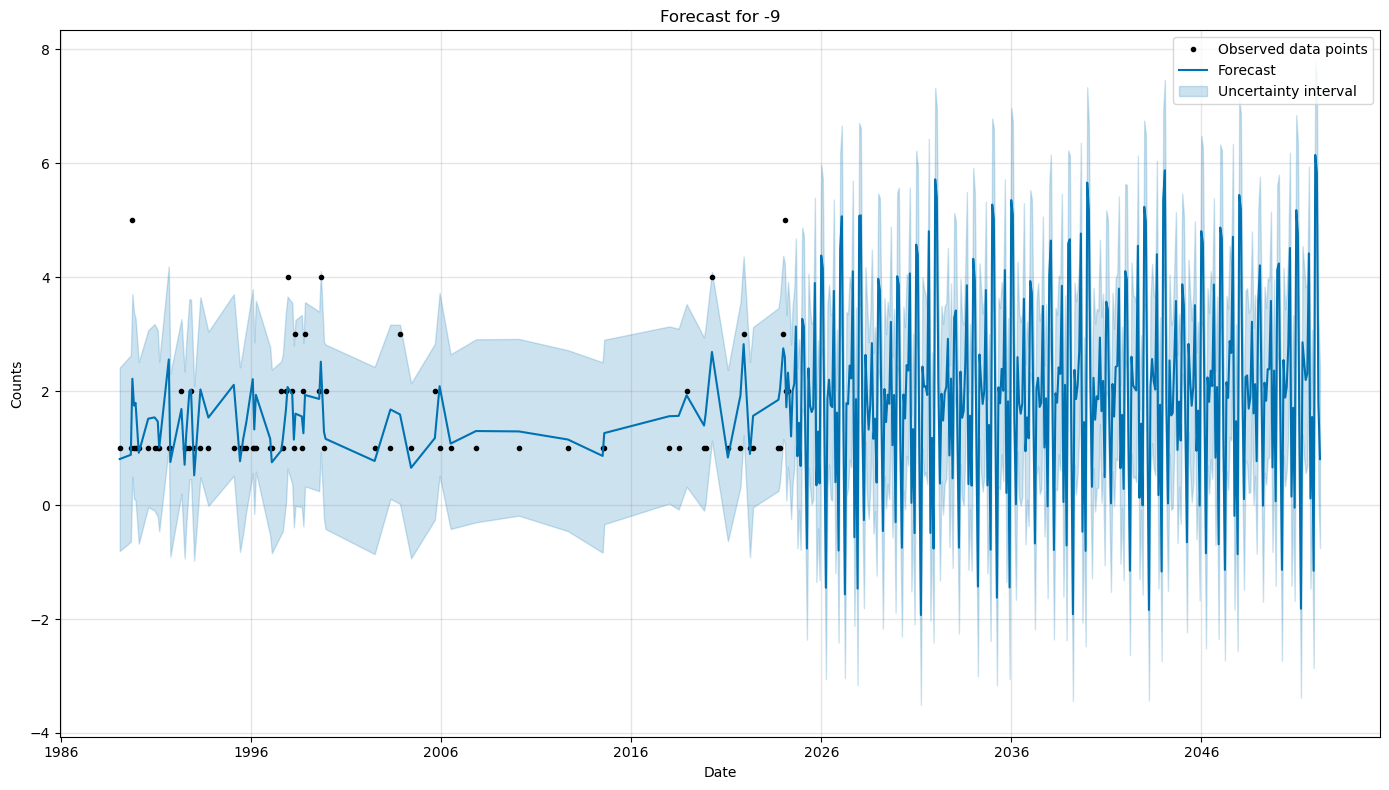

Dickey-Fuller Test Results:

Time of day: +65
ADF Statistic: -2.9661363084548427
p-value: 0.03818015575634444
Critical Value 1%: -3.4463221132914486
Critical Value 5%: -2.8685808072418824
Critical Value 10%: -2.570520529031954

Time of day: 0_to_16
ADF Statistic: -2.6799851452392778
p-value: 0.07756621043915206
Critical Value 1%: -3.4462831955497135
Critical Value 5%: -2.8685636962704395
Critical Value 10%: -2.5705114078759914

Time of day: 17_to_25
ADF Statistic: -3.117978049331433
p-value: 0.02525102481119954
Critical Value 1%: -3.4464400156784927
Critical Value 5%: -2.868632644097719
Critical Value 10%: -2.5705481612974577

Time of day: 26_to_39
ADF Statistic: -3.4719009002712466
p-value: 0.008738753190971326
Critical Value 1%: -3.4463221132914486
Critical Value 5%: -2.8685808072418824
Critical Value 10%: -2.570520529031954

Time of day: 40_to_64
ADF Statistic: -8.2726072020515
p-value: 4.748620218008186e-13
Critical Value 1%: -3.445978550826048
Critical Value 5%: -2.868429745639487

In [14]:
#Without Holidays
#Without Holidays
#Without Holidays
#Without Holidays

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = pd.Series(y_true), pd.Series(y_pred)
    return (abs((y_true - y_pred) / y_true)).mean() * 100

# Assuming 'data' is your dataframe
# Merge the age groups '65_to_74' and '75_or_older' into '+65'
data['Age Group'] = data['Age Group'].replace({'65_to_74': '+65', '75_or_older': '+65'})

# Convert the 'Year' and 'Month' columns to a single datetime column
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Filter data up to 2022 for training and 2023 for testing
train_data = data[data['Year'] <= 2022]
test_data = data[data['Year'] == 2023]

# Aggregate the number of occurrences of each feature per month for training data
def aggregate_counts(data, feature):
    return data.groupby(['Date', feature]).size().reset_index(name='Counts')

# Prepare the data for Prophet and forecast
def forecast_feature(data, feature):
    counts = aggregate_counts(data, feature)
    
    models = {}
    forecasts = {}
    for value in counts[feature].unique():
        value_data = counts[counts[feature] == value]
        value_data = value_data[['Date', 'Counts']].rename(columns={'Date': 'ds', 'Counts': 'y'})

        # Initialize and fit the Prophet model
        model = Prophet(interval_width=0.95,
                        yearly_seasonality=True,
                        daily_seasonality=True,
                        weekly_seasonality=True,
                        seasonality_mode='additive')
        model.fit(value_data)
        models[value] = model

        # Create a dataframe for future dates including 2023 (test period) and beyond
        future_dates = model.make_future_dataframe(periods=(2050 - 2022) * 12, freq='M')

        # Predict future values
        forecast = model.predict(future_dates)
        forecasts[value] = forecast
    
    return models, forecasts

# Forecast for a specific feature
feature = 'Age Group'  # Change this to the desired feature
time_of_day_models, forecasts = forecast_feature(data, feature)

# Calculate and print evaluation metrics for the test period (2023)
print(f"Evaluation Metrics for the Test Period (2023) - {feature}:")
for value, forecast in forecasts.items():
    # Filter forecast for 2023
    forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]

    # Filter actual counts for 2023
    actual_counts_2023 = test_data[test_data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    actual_counts_2023 = actual_counts_2023.rename(columns={'Date': 'ds', 'Counts': 'y'})

    # Ensure the forecast and actual data are aligned
    forecast_2023 = forecast_2023.set_index('ds').loc[actual_counts_2023['ds']].reset_index()

    # Calculate evaluation metrics
    mae = mean_absolute_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mse = mean_squared_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mape = mean_absolute_percentage_error(actual_counts_2023['y'], forecast_2023['yhat'])

    print(f"{value} - MAE: {mae:.2f}, MSE: {mse:.2f}, MAPE: {mape:.2f}%")
    print(f"Forecast vs Actual for first three months of 2024 for {value}:")
    future_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(future_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # Filter actual counts for first three months of 2024
    actual_counts_2024 = data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2024-03-31') & (data[feature] == value)]
    actual_counts_2024 = actual_counts_2024.groupby('Date').size().reset_index(name='Counts')
    print(actual_counts_2024)
    print()

    # Print forecast for 2030, 2040, and 2050
    future_2030 = forecast[(forecast['ds'] >= '2030-01-01') & (forecast['ds'] <= '2030-12-31')]
    future_2040 = forecast[(forecast['ds'] >= '2040-01-01') & (forecast['ds'] <= '2040-12-31')]
    future_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]
    
    print(f"Forecast for {value} in 2030:")
    print(future_2030[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2040:")
    print(future_2040[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2050:")
    print(future_2050[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    total_2030 = future_2030['yhat'].sum()
    total_2040 = future_2040['yhat'].sum()
    total_2050 = future_2050['yhat'].sum()

    print(f"Total forecasted counts for {value} in 2030: {total_2030:.2f}")
    print(f"Total forecasted counts for {value} in 2040: {total_2040:.2f}")
    print(f"Total forecasted counts for {value} in 2050: {total_2050:.2f}")
    print()
# Plot the forecasts in separate figures
for value, forecast in forecasts.items():
    fig, ax = plt.subplots(figsize=(14, 8))
    model = time_of_day_models[value]
    model.plot(forecast, ax=ax, xlabel='Date', ylabel='Counts')
    
    # Plot training data
   
    
    ax.legend()
    ax.set_title(f'Forecast for {value}')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Perform Dickey-Fuller Test
print("Dickey-Fuller Test Results:")
for value, forecast in forecasts.items():
    time_data = data[data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    adf_result = adfuller(time_data['Counts'])
    print(f"\nTime of day: {value}")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    for key, value in adf_result[4].items():
        print(f"Critical Value {key}: {value}")

# Print actual counts for each year from 2013 to 2023
print("\nActual Counts per Year (2013-2023):")
for year in range(2013, 2024):
    year_counts = data[data['Year'] == year].groupby('Year').size().reset_index(name='Counts')
    print(f"Year {year}: {year_counts['Counts'].sum()} counts")



WITH HOLIDAY manual


00:04:02 - cmdstanpy - INFO - Chain [1] start processing
00:04:02 - cmdstanpy - INFO - Chain [1] done processing
00:04:02 - cmdstanpy - INFO - Chain [1] start processing
00:04:02 - cmdstanpy - INFO - Chain [1] done processing
00:04:02 - cmdstanpy - INFO - Chain [1] start processing
00:04:02 - cmdstanpy - INFO - Chain [1] done processing
00:04:03 - cmdstanpy - INFO - Chain [1] start processing
00:04:03 - cmdstanpy - INFO - Chain [1] done processing
00:04:03 - cmdstanpy - INFO - Chain [1] start processing
00:04:03 - cmdstanpy - INFO - Chain [1] done processing
00:04:03 - cmdstanpy - INFO - Chain [1] start processing
00:04:03 - cmdstanpy - INFO - Chain [1] done processing


Evaluation Metrics for the Test Period (2023) - Age Group:
+65 - MAE: 3.87, MSE: 19.73, MAPE: 15.20%
Forecast vs Actual for first three months of 2024 for +65:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  23.344502   13.486175   33.188627
421 2024-02-01  21.975487   12.141347   32.430681
422 2024-03-01  22.973508   13.092947   32.873067
        Date  Counts
0 2024-01-01      25
1 2024-02-01      17
2 2024-03-01      25

Forecast for +65 in 2030:
            ds       yhat  yhat_lower  yhat_upper
493 2030-01-31  17.439221    7.169533   27.559629
494 2030-02-28  25.112725   14.885074   35.179075
495 2030-03-31  22.053990   11.224233   32.632884
496 2030-04-30  24.595604   13.595687   34.546928
497 2030-05-31  23.130231   13.054676   33.147681
498 2030-06-30  26.507786   17.022451   36.940409
499 2030-07-31  24.805549   13.942439   34.392306
500 2030-08-31  21.820921   11.455728   31.995514
501 2030-09-30  22.464066   12.307074   32.263115
502 2030-10-31  22.845656   1

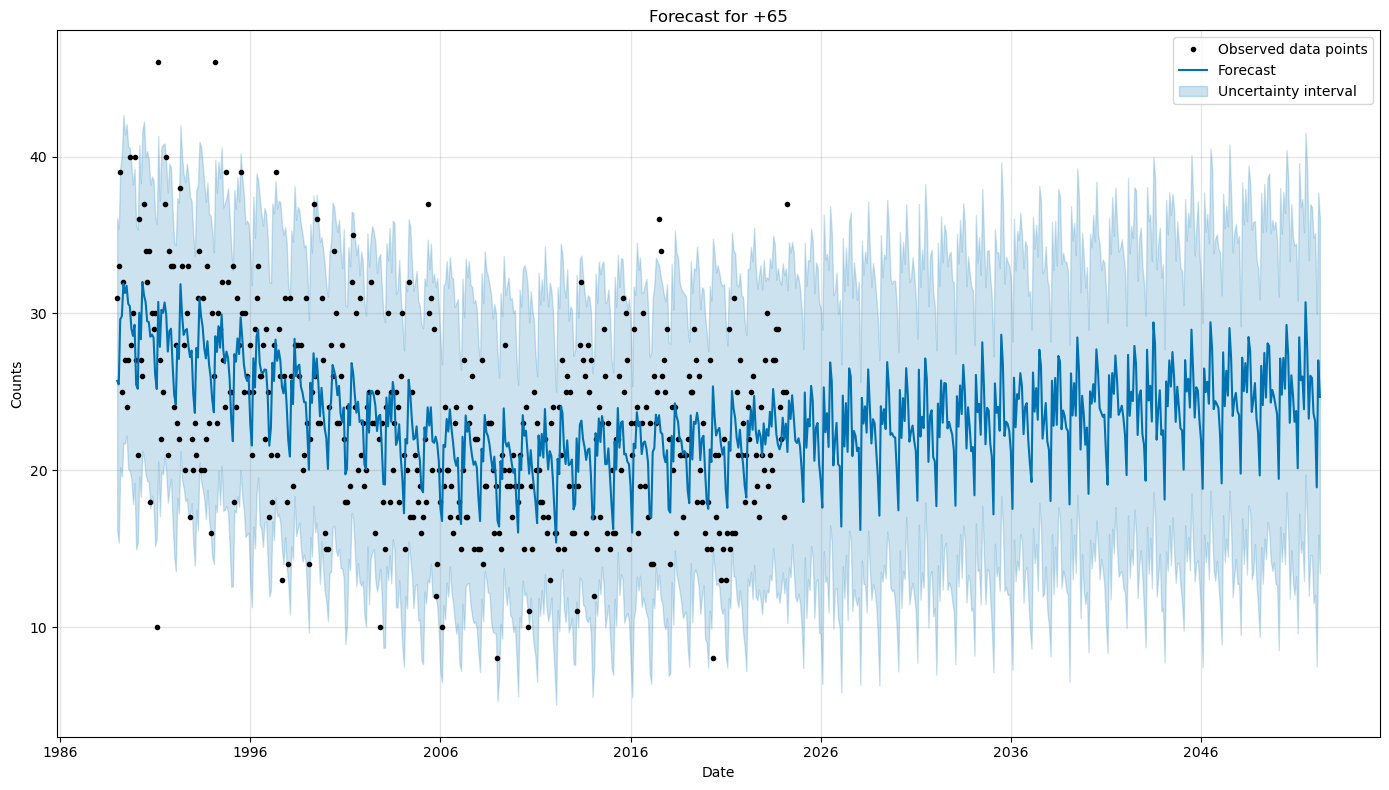

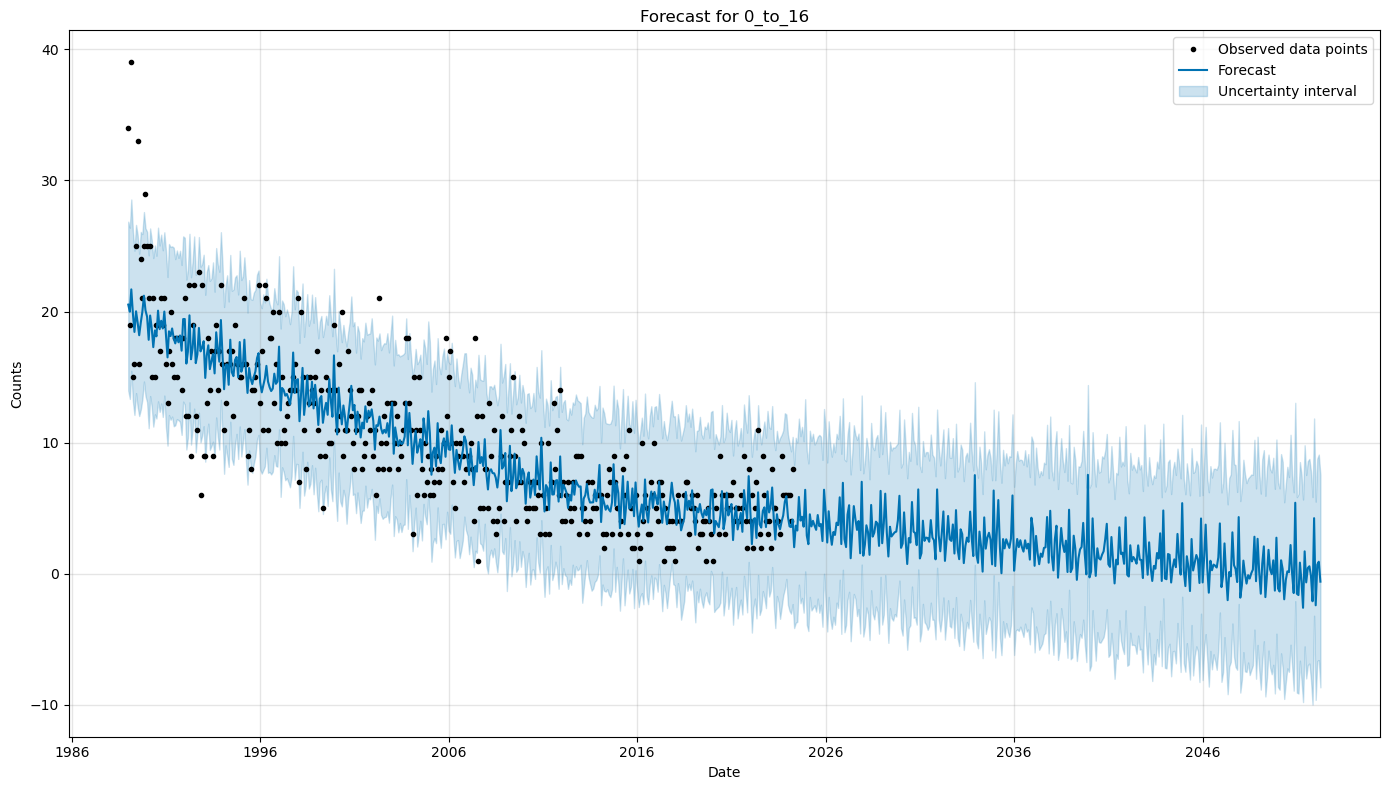

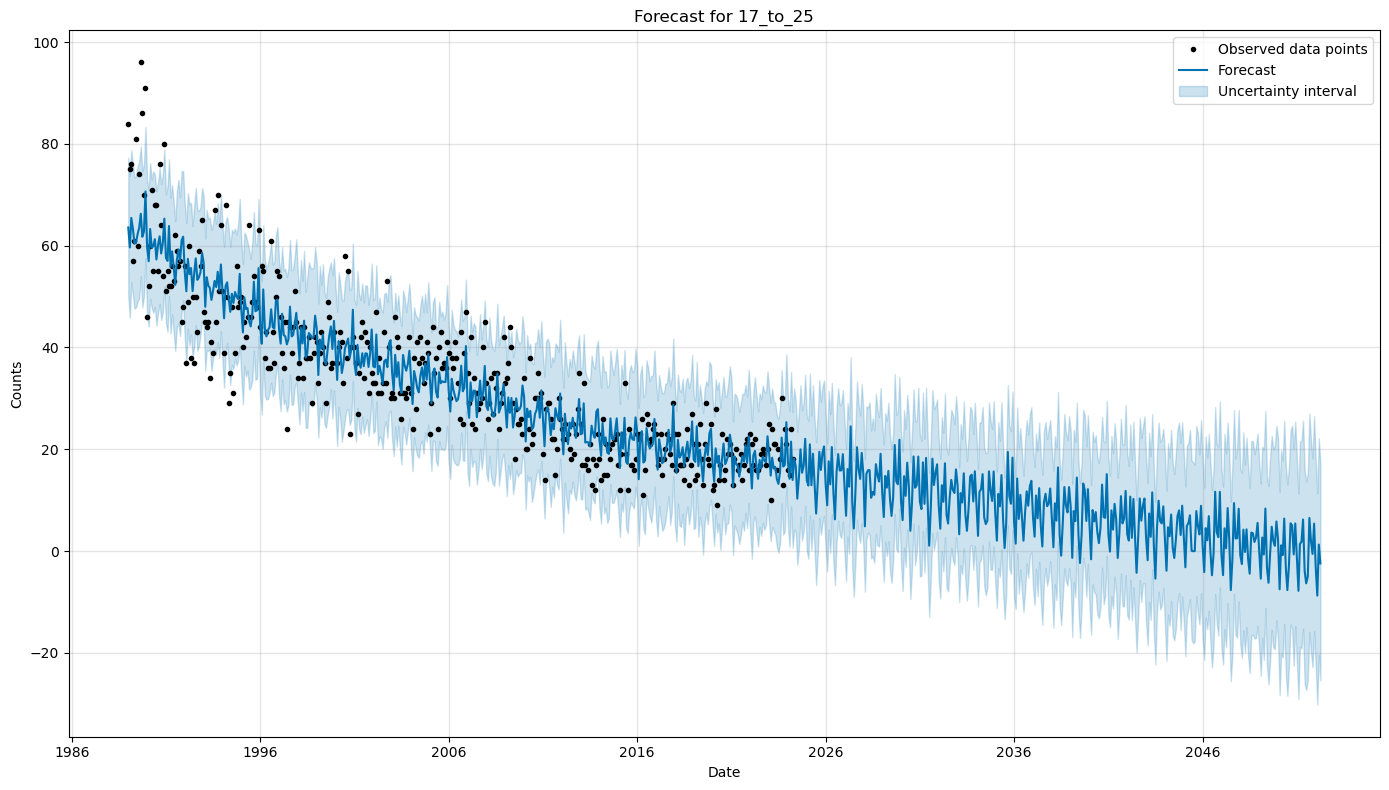

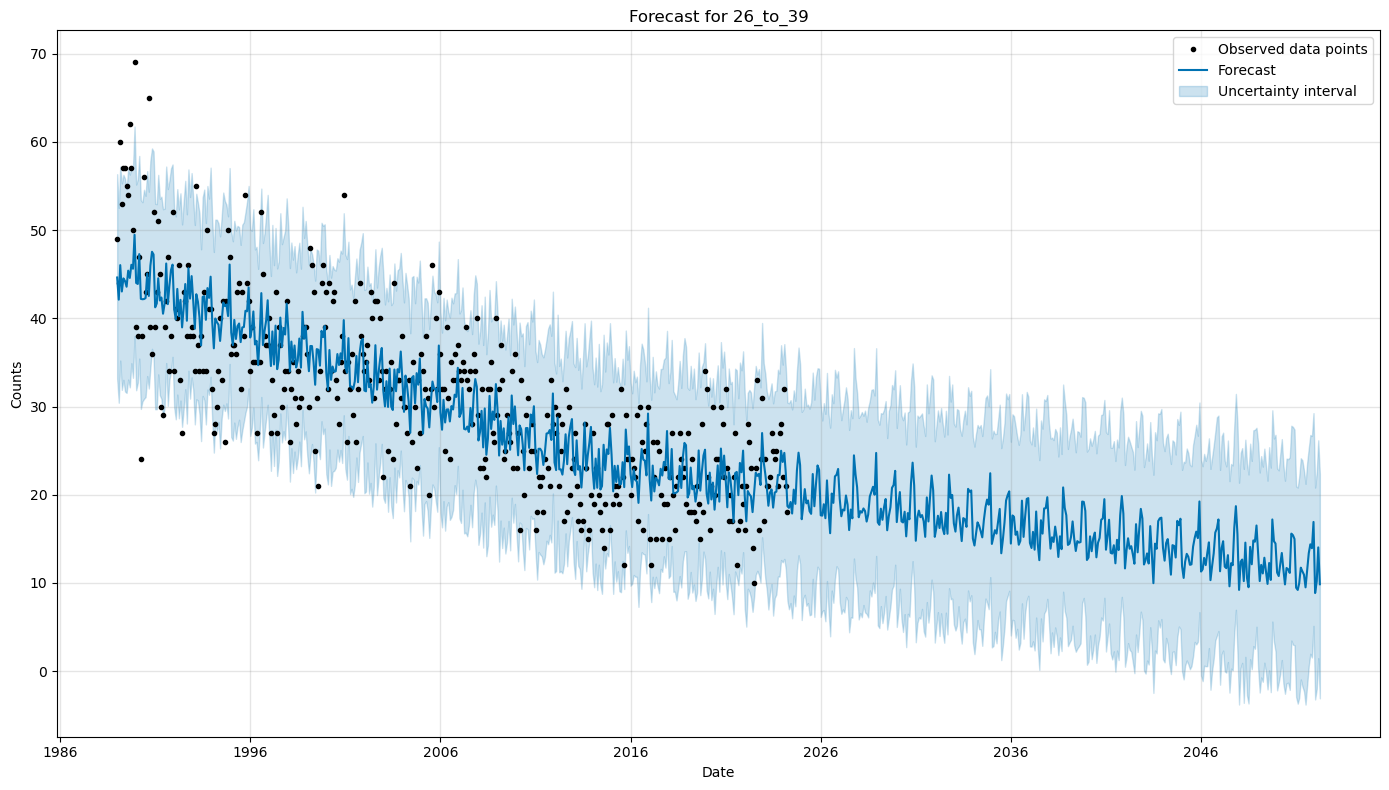

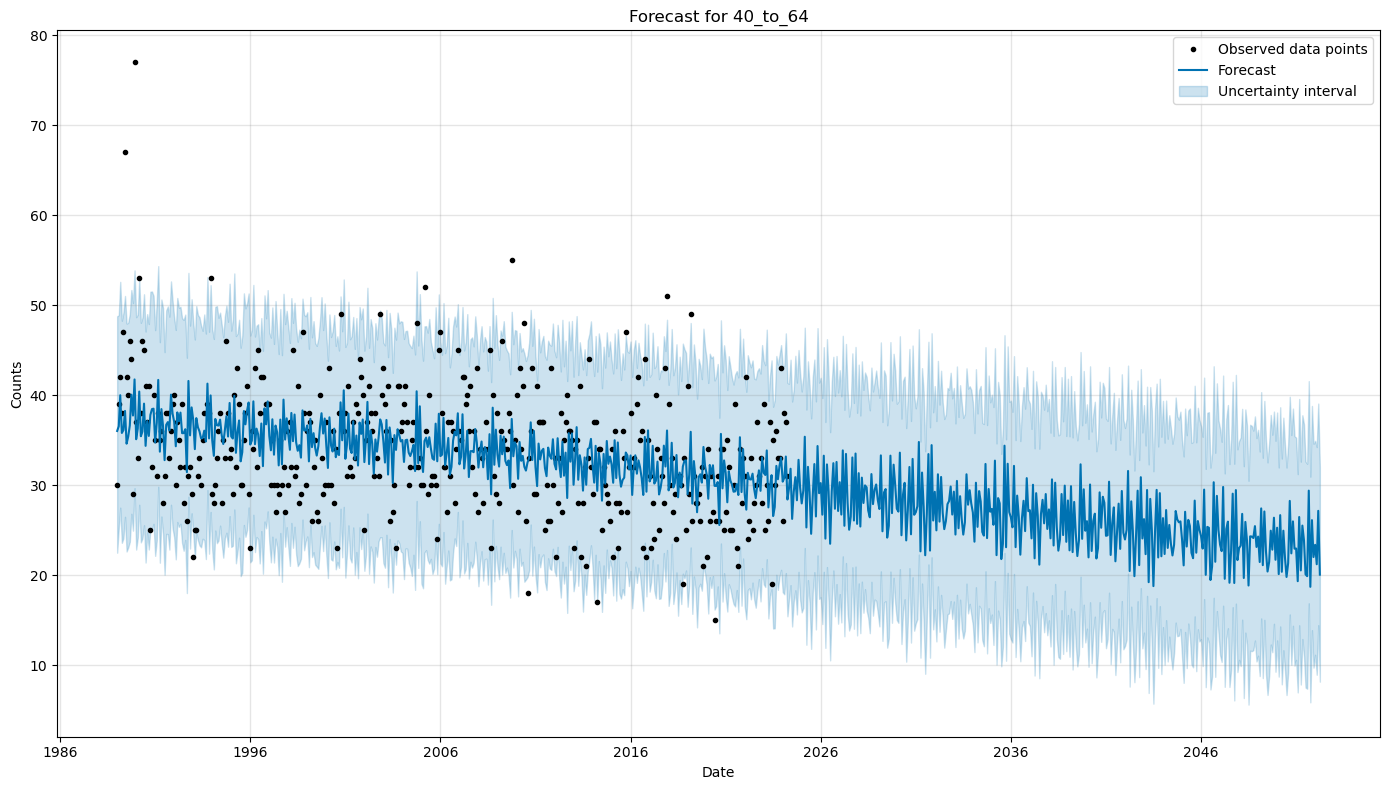

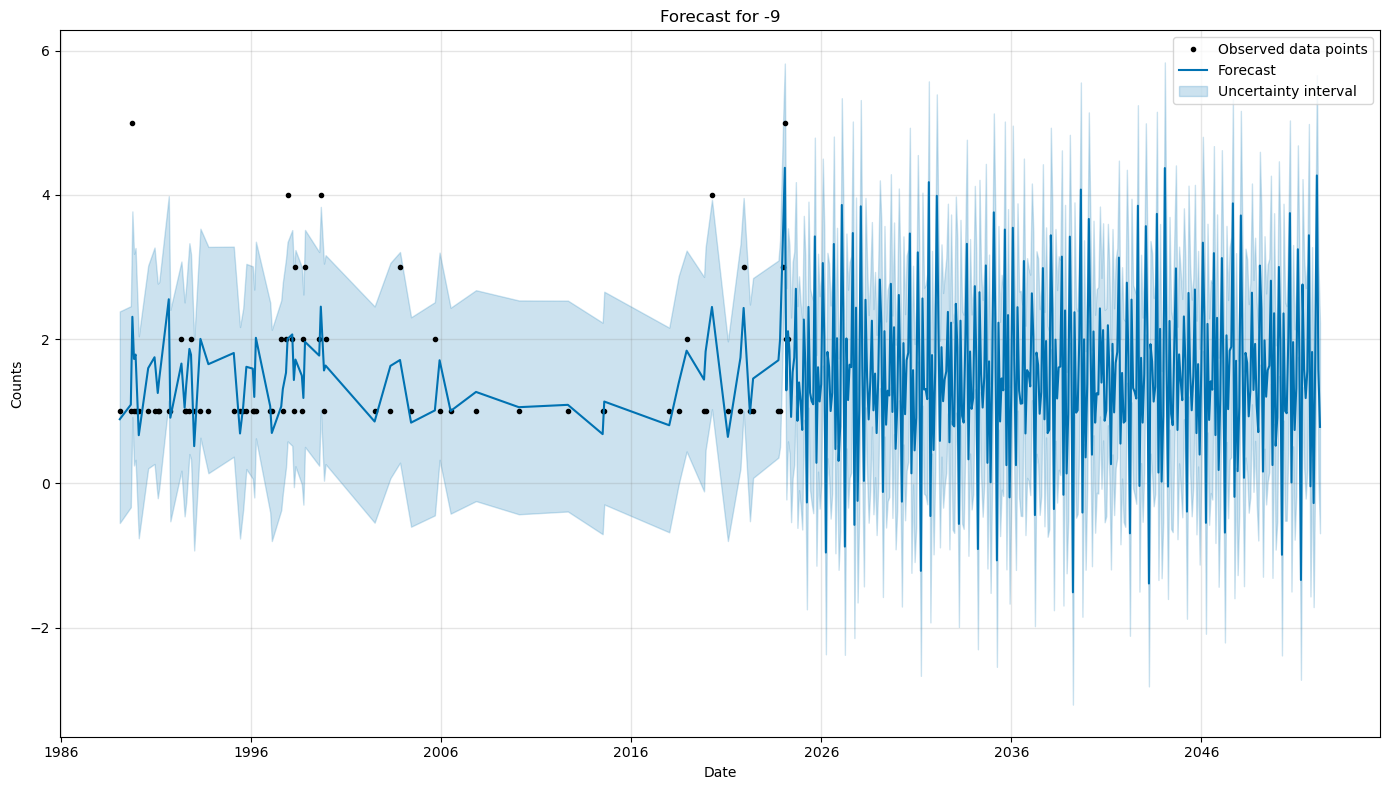

Dickey-Fuller Test Results:

Time of day: +65
ADF Statistic: -2.9661363084548427
p-value: 0.03818015575634444
Critical Value 1%: -3.4463221132914486
Critical Value 5%: -2.8685808072418824
Critical Value 10%: -2.570520529031954

Time of day: 0_to_16
ADF Statistic: -2.6799851452392778
p-value: 0.07756621043915206
Critical Value 1%: -3.4462831955497135
Critical Value 5%: -2.8685636962704395
Critical Value 10%: -2.5705114078759914

Time of day: 17_to_25
ADF Statistic: -3.117978049331433
p-value: 0.02525102481119954
Critical Value 1%: -3.4464400156784927
Critical Value 5%: -2.868632644097719
Critical Value 10%: -2.5705481612974577

Time of day: 26_to_39
ADF Statistic: -3.4719009002712466
p-value: 0.008738753190971326
Critical Value 1%: -3.4463221132914486
Critical Value 5%: -2.8685808072418824
Critical Value 10%: -2.570520529031954

Time of day: 40_to_64
ADF Statistic: -8.2726072020515
p-value: 4.748620218008186e-13
Critical Value 1%: -3.445978550826048
Critical Value 5%: -2.868429745639487

In [13]:
#WITH HOLIDAY manual
#WITH HOLIDAY manual
#WITH HOLIDAY manual
#WITH HOLIDAY manual
#WITH HOLIDAY manual

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = pd.Series(y_true), pd.Series(y_pred)
    return (abs((y_true - y_pred) / y_true)).mean() * 100

# Assuming 'data' is your dataframe
# Merge the age groups '65_to_74' and '75_or_older' into '+65'
data['Age Group'] = data['Age Group'].replace({'65_to_74': '+65', '75_or_older': '+65'})
holidays = pd.DataFrame({
    'holiday': 'public_holiday',
    'ds': pd.to_datetime([
        
        '2024-01-01', '2024-02-01','2023-01-01','2023-02-01' 
        
        
        
        # Add more holidays as needed
    ]),
    'lower_window': 0,
    'upper_window': 1,
})
# Convert the 'Year' and 'Month' columns to a single datetime column
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Filter data up to 2022 for training and 2023 for testing
train_data = data[data['Year'] <= 2022]
test_data = data[data['Year'] == 2023]

# Aggregate the number of occurrences of each feature per month for training data
def aggregate_counts(data, feature):
    return data.groupby(['Date', feature]).size().reset_index(name='Counts')

# Prepare the data for Prophet and forecast
def forecast_feature(data, feature):
    counts = aggregate_counts(data, feature)
    
    models = {}
    forecasts = {}
    for value in counts[feature].unique():
        value_data = counts[counts[feature] == value]
        value_data = value_data[['Date', 'Counts']].rename(columns={'Date': 'ds', 'Counts': 'y'})

        # Initialize and fit the Prophet model
        model = Prophet(interval_width=0.95,
                        yearly_seasonality=True,
                        daily_seasonality=True,
                        weekly_seasonality=True,
                        seasonality_mode='additive',holidays=holidays)
        model.fit(value_data)
        models[value] = model

        # Create a dataframe for future dates including 2023 (test period) and beyond
        future_dates = model.make_future_dataframe(periods=(2050 - 2022) * 12, freq='M')

        # Predict future values
        forecast = model.predict(future_dates)
        forecasts[value] = forecast
    
    return models, forecasts

# Forecast for a specific feature
feature = 'Age Group'  # Change this to the desired feature
time_of_day_models, forecasts = forecast_feature(data, feature)

# Calculate and print evaluation metrics for the test period (2023)
print(f"Evaluation Metrics for the Test Period (2023) - {feature}:")
for value, forecast in forecasts.items():
    # Filter forecast for 2023
    forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]

    # Filter actual counts for 2023
    actual_counts_2023 = test_data[test_data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    actual_counts_2023 = actual_counts_2023.rename(columns={'Date': 'ds', 'Counts': 'y'})

    # Ensure the forecast and actual data are aligned
    forecast_2023 = forecast_2023.set_index('ds').loc[actual_counts_2023['ds']].reset_index()

    # Calculate evaluation metrics
    mae = mean_absolute_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mse = mean_squared_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mape = mean_absolute_percentage_error(actual_counts_2023['y'], forecast_2023['yhat'])

    print(f"{value} - MAE: {mae:.2f}, MSE: {mse:.2f}, MAPE: {mape:.2f}%")
    print(f"Forecast vs Actual for first three months of 2024 for {value}:")
    future_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(future_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # Filter actual counts for first three months of 2024
    actual_counts_2024 = data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2024-03-31') & (data[feature] == value)]
    actual_counts_2024 = actual_counts_2024.groupby('Date').size().reset_index(name='Counts')
    print(actual_counts_2024)
    print()

    # Print forecast for 2030, 2040, and 2050
    future_2030 = forecast[(forecast['ds'] >= '2030-01-01') & (forecast['ds'] <= '2030-12-31')]
    future_2040 = forecast[(forecast['ds'] >= '2040-01-01') & (forecast['ds'] <= '2040-12-31')]
    future_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]
    
    print(f"Forecast for {value} in 2030:")
    print(future_2030[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2040:")
    print(future_2040[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2050:")
    print(future_2050[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    total_2030 = future_2030['yhat'].sum()
    total_2040 = future_2040['yhat'].sum()
    total_2050 = future_2050['yhat'].sum()

    print(f"Total forecasted counts for {value} in 2030: {total_2030:.2f}")
    print(f"Total forecasted counts for {value} in 2040: {total_2040:.2f}")
    print(f"Total forecasted counts for {value} in 2050: {total_2050:.2f}")
    print()
# Plot the forecasts in separate figures
for value, forecast in forecasts.items():
    fig, ax = plt.subplots(figsize=(14, 8))
    model = time_of_day_models[value]
    model.plot(forecast, ax=ax, xlabel='Date', ylabel='Counts')
    
    # Plot training data
   
    
    ax.legend()
    ax.set_title(f'Forecast for {value}')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Perform Dickey-Fuller Test
print("Dickey-Fuller Test Results:")
for value, forecast in forecasts.items():
    time_data = data[data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    adf_result = adfuller(time_data['Counts'])
    print(f"\nTime of day: {value}")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    for key, value in adf_result[4].items():
        print(f"Critical Value {key}: {value}")

# Print actual counts for each year from 2013 to 2023
print("\nActual Counts per Year (2013-2023):")
for year in range(2013, 2024):
    year_counts = data[data['Year'] == year].groupby('Year').size().reset_index(name='Counts')
    print(f"Year {year}: {year_counts['Counts'].sum()} counts")



00:39:24 - cmdstanpy - INFO - Chain [1] start processing
00:39:25 - cmdstanpy - INFO - Chain [1] done processing
00:39:25 - cmdstanpy - INFO - Chain [1] start processing
00:39:25 - cmdstanpy - INFO - Chain [1] done processing
00:39:25 - cmdstanpy - INFO - Chain [1] start processing
00:39:25 - cmdstanpy - INFO - Chain [1] done processing
00:39:25 - cmdstanpy - INFO - Chain [1] start processing
00:39:26 - cmdstanpy - INFO - Chain [1] done processing
00:39:26 - cmdstanpy - INFO - Chain [1] start processing
00:39:26 - cmdstanpy - INFO - Chain [1] done processing
00:39:26 - cmdstanpy - INFO - Chain [1] start processing
00:39:26 - cmdstanpy - INFO - Chain [1] done processing


Evaluation Metrics for the Test Period (2023) - Age Group:
+65 - MAE: 3.82, MSE: 22.26, MAPE: 14.82%
Forecast vs Actual for first three months of 2024 for +65:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  19.203821    9.427536   29.448991
421 2024-02-01  18.078769    8.432175   27.589559
422 2024-03-01  23.389529   13.849171   33.859918
        Date  Counts
0 2024-01-01      25
1 2024-02-01      17
2 2024-03-01      25

Forecast for +65 in 2030:
            ds       yhat  yhat_lower  yhat_upper
493 2030-01-31  18.430169    8.352917   28.497772
494 2030-02-28  25.763119   16.294989   35.502390
495 2030-03-31  22.290151   12.021259   31.977430
496 2030-04-30  25.077343   14.769938   34.915597
497 2030-05-31  23.607244   13.418300   32.940538
498 2030-06-30  27.583894   17.453798   37.567559
499 2030-07-31  25.761313   16.262150   35.708214
500 2030-08-31  22.260036   11.916637   31.516579
501 2030-09-30  22.774081   13.081054   32.752700
502 2030-10-31  23.486331   1

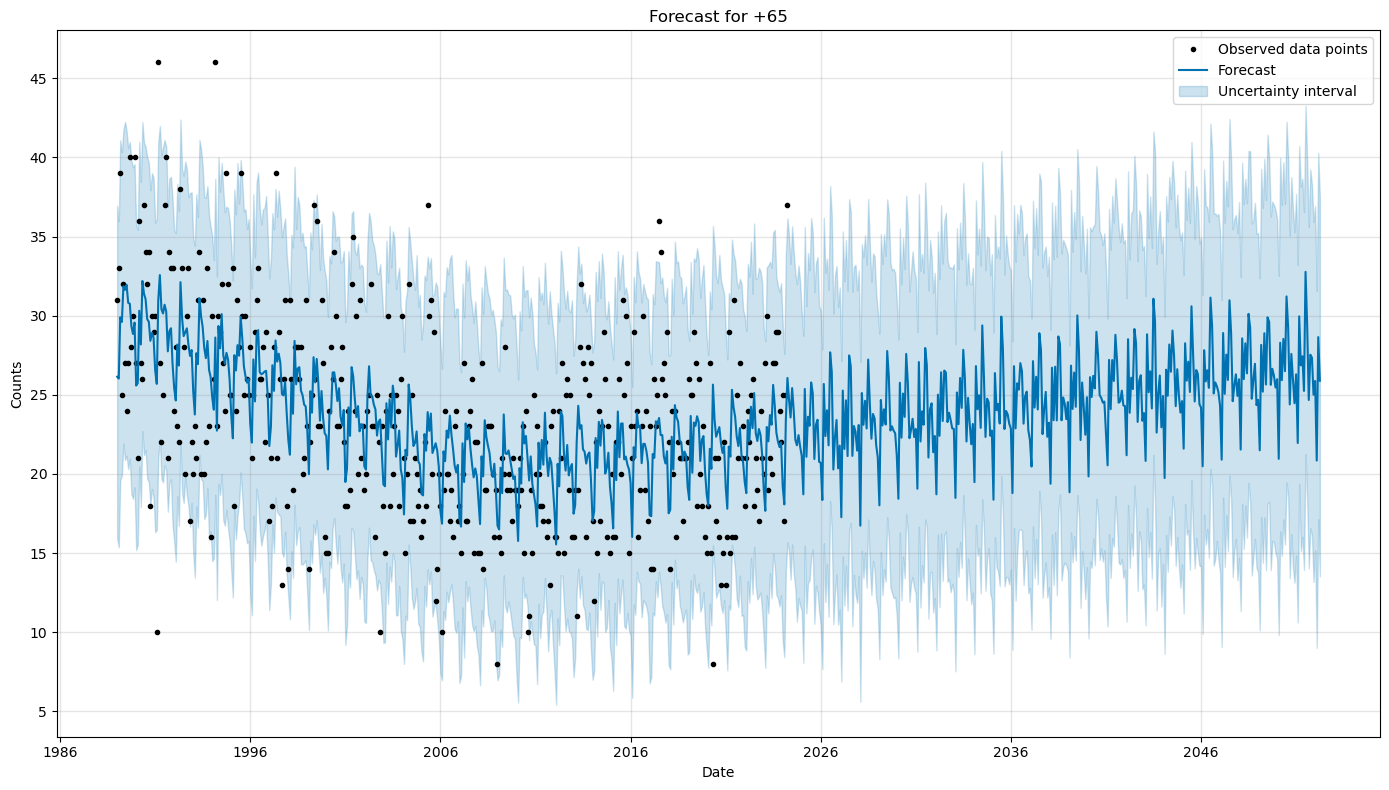

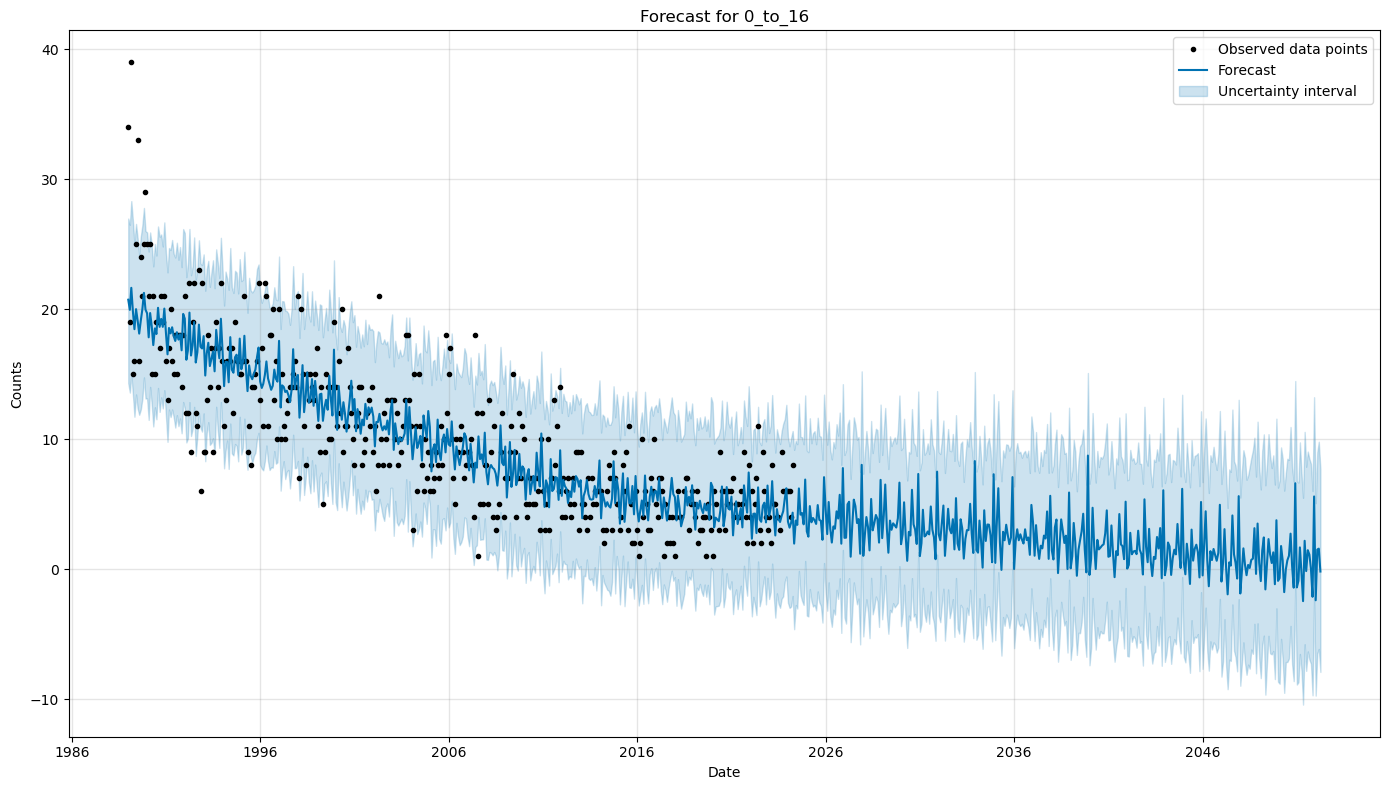

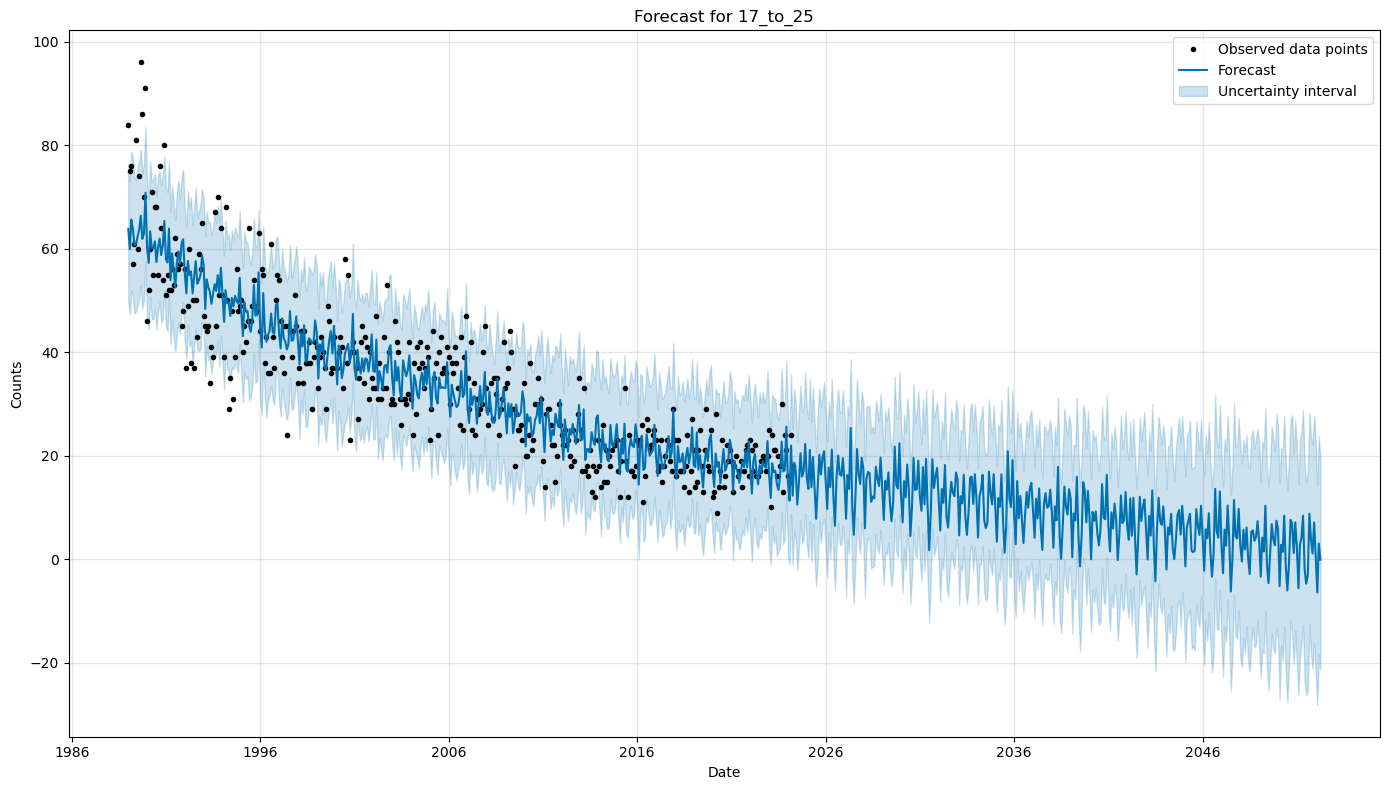

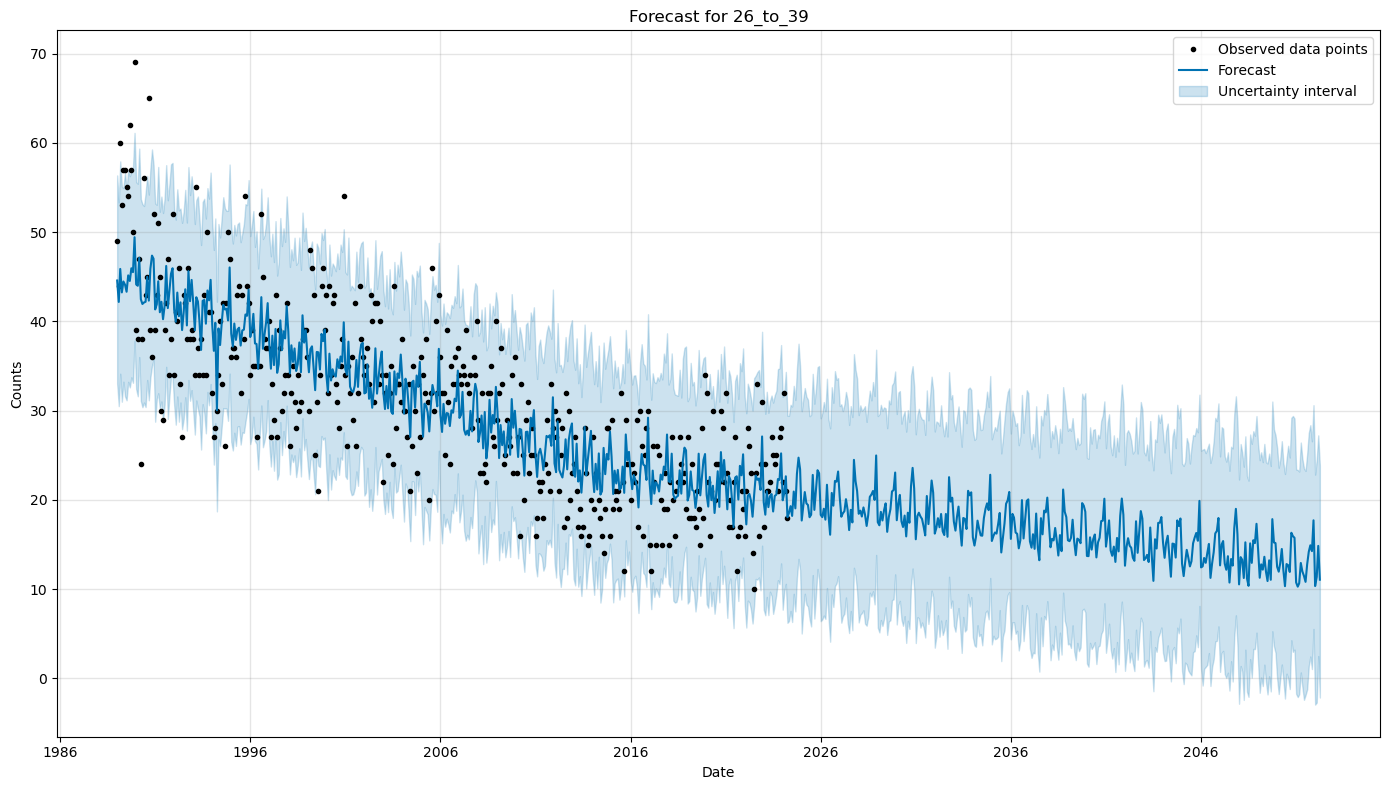

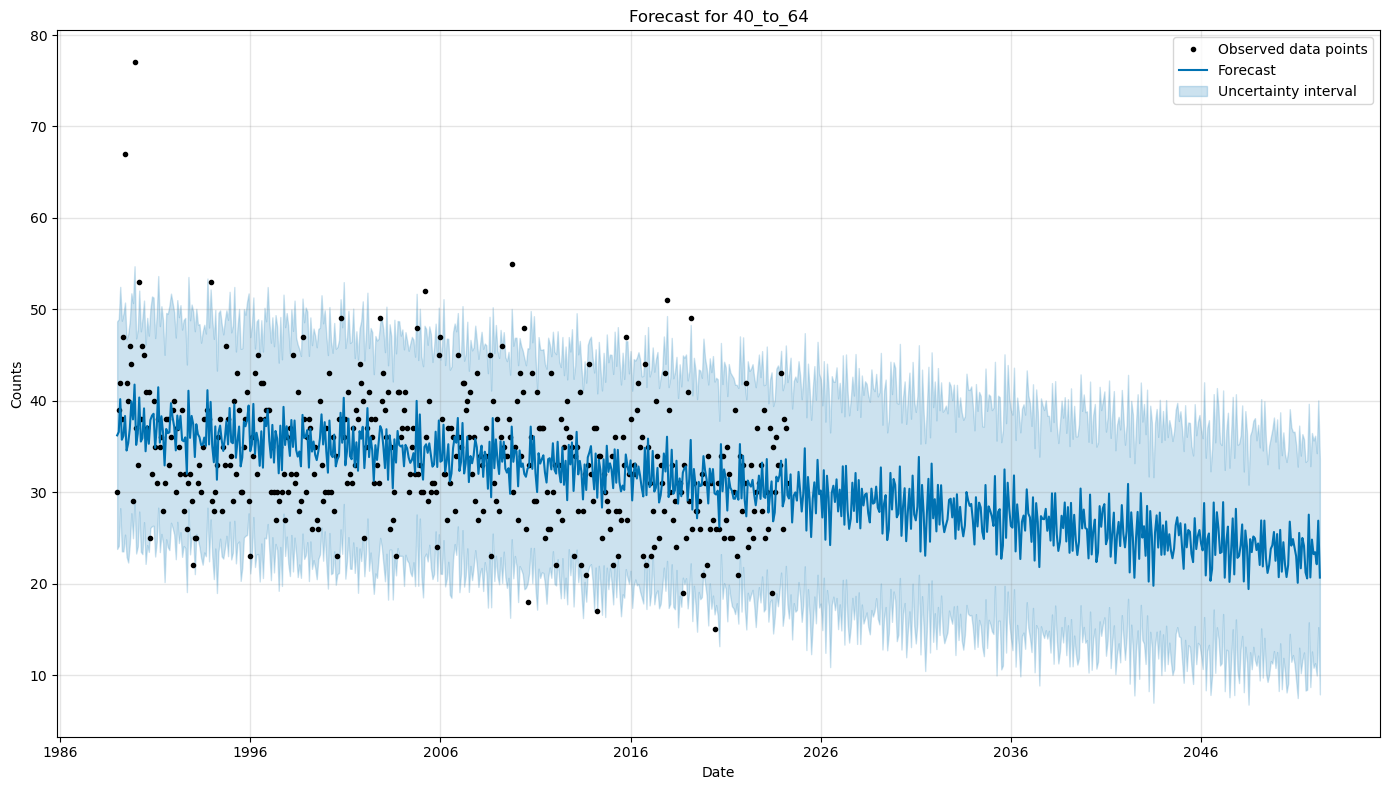

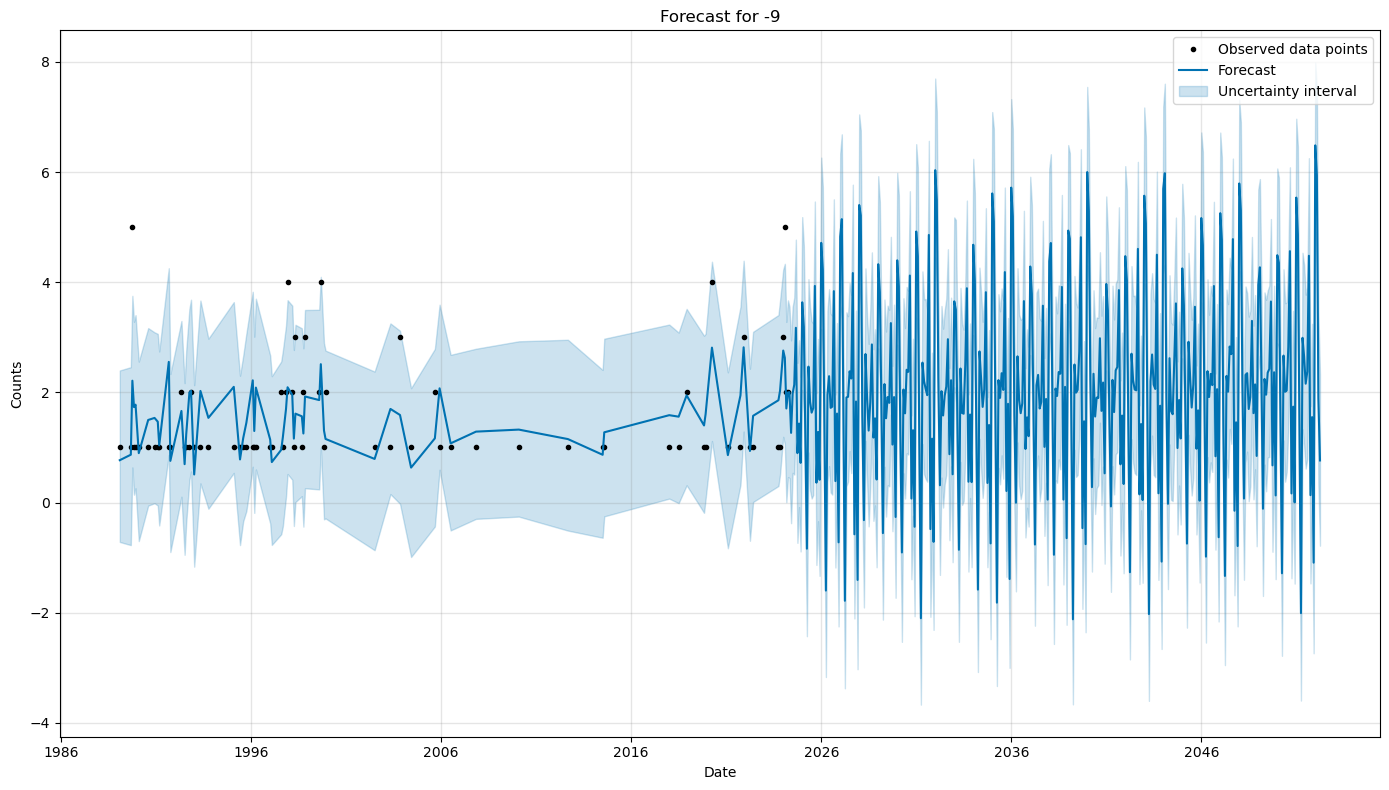

Dickey-Fuller Test Results:

Time of day: +65
ADF Statistic: -2.9661363084548427
p-value: 0.03818015575634444
Critical Value 1%: -3.4463221132914486
Critical Value 5%: -2.8685808072418824
Critical Value 10%: -2.570520529031954

Time of day: 0_to_16
ADF Statistic: -2.6799851452392778
p-value: 0.07756621043915206
Critical Value 1%: -3.4462831955497135
Critical Value 5%: -2.8685636962704395
Critical Value 10%: -2.5705114078759914

Time of day: 17_to_25
ADF Statistic: -3.117978049331433
p-value: 0.02525102481119954
Critical Value 1%: -3.4464400156784927
Critical Value 5%: -2.868632644097719
Critical Value 10%: -2.5705481612974577

Time of day: 26_to_39
ADF Statistic: -3.4719009002712466
p-value: 0.008738753190971326
Critical Value 1%: -3.4463221132914486
Critical Value 5%: -2.8685808072418824
Critical Value 10%: -2.570520529031954

Time of day: 40_to_64
ADF Statistic: -8.2726072020515
p-value: 4.748620218008186e-13
Critical Value 1%: -3.445978550826048
Critical Value 5%: -2.868429745639487

In [18]:
#Holiday with package
#Holiday with package
#Holiday with package
#Holiday with package
#Holiday with package

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
import holidays

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = pd.Series(y_true), pd.Series(y_pred)
    return (abs((y_true - y_pred) / y_true)).mean() * 100

# Assuming 'data' is your dataframe
# Merge the age groups '65_to_74' and '75_or_older' into '+65'
data['Age Group'] = data['Age Group'].replace({'65_to_74': '+65', '75_or_older': '+65'})

# Convert the 'Year' and 'Month' columns to a single datetime column
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Filter data up to 2022 for training and 2023 for testing
train_data = data[data['Year'] <= 2022]
test_data = data[data['Year'] == 2023]

# Aggregate the number of occurrences of each feature per month for training data
def aggregate_counts(data, feature):
    return data.groupby(['Date', feature]).size().reset_index(name='Counts')

# Prepare the data for Prophet and forecast
def forecast_feature(data, feature):
    counts = aggregate_counts(data, feature)
    
    models = {}
    forecasts = {}
    
    # Create a dataframe for Australian holidays
    aus_holidays = holidays.Australia(years=range(1989, 2051))
    holidays_df = pd.DataFrame(list(aus_holidays.items()), columns=['ds', 'holiday'])
    
    for value in counts[feature].unique():
        value_data = counts[counts[feature] == value]
        value_data = value_data[['Date', 'Counts']].rename(columns={'Date': 'ds', 'Counts': 'y'})

        # Initialize and fit the Prophet model
        model = Prophet(interval_width=0.95,
                        yearly_seasonality=True,
                        daily_seasonality=True,
                        weekly_seasonality=True,
                        seasonality_mode='additive',
                        holidays=holidays_df)
        model.fit(value_data)
        models[value] = model

        # Create a dataframe for future dates including 2023 (test period) and beyond
        future_dates = model.make_future_dataframe(periods=(2050 - 2022) * 12, freq='M')

        # Predict future values
        forecast = model.predict(future_dates)
        forecasts[value] = forecast
    
    return models, forecasts

# Forecast for a specific feature
feature = 'Age Group'  # Change this to the desired feature
time_of_day_models, forecasts = forecast_feature(data, feature)

# Calculate and print evaluation metrics for the test period (2023)
print(f"Evaluation Metrics for the Test Period (2023) - {feature}:")
for value, forecast in forecasts.items():
    # Filter forecast for 2023
    forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]

    # Filter actual counts for 2023
    actual_counts_2023 = test_data[test_data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    actual_counts_2023 = actual_counts_2023.rename(columns={'Date': 'ds', 'Counts': 'y'})

    # Ensure the forecast and actual data are aligned
    forecast_2023 = forecast_2023.set_index('ds').loc[actual_counts_2023['ds']].reset_index()

    # Calculate evaluation metrics
    mae = mean_absolute_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mse = mean_squared_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mape = mean_absolute_percentage_error(actual_counts_2023['y'], forecast_2023['yhat'])

    print(f"{value} - MAE: {mae:.2f}, MSE: {mse:.2f}, MAPE: {mape:.2f}%")
    print(f"Forecast vs Actual for first three months of 2024 for {value}:")
    future_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(future_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # Filter actual counts for first three months of 2024
    actual_counts_2024 = data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2024-03-31') & (data[feature] == value)]
    actual_counts_2024 = actual_counts_2024.groupby('Date').size().reset_index(name='Counts')
    print(actual_counts_2024)
    print()

    # Print forecast for 2030, 2040, and 2050
    future_2030 = forecast[(forecast['ds'] >= '2030-01-01') & (forecast['ds'] <= '2030-12-31')]
    future_2040 = forecast[(forecast['ds'] >= '2040-01-01') & (forecast['ds'] <= '2040-12-31')]
    future_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]
    
    print(f"Forecast for {value} in 2030:")
    print(future_2030[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2040:")
    print(future_2040[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2050:")
    print(future_2050[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    total_2030 = future_2030['yhat'].sum()
    total_2040 = future_2040['yhat'].sum()
    total_2050 = future_2050['yhat'].sum()

    print(f"Total forecasted counts for {value} in 2030: {total_2030:.2f}")
    print(f"Total forecasted counts for {value} in 2040: {total_2040:.2f}")
    print(f"Total forecasted counts for {value} in 2050: {total_2050:.2f}")
    print()
# Plot the forecasts in separate figures
for value, forecast in forecasts.items():
    fig, ax = plt.subplots(figsize=(14, 8))
    model = time_of_day_models[value]
    model.plot(forecast, ax=ax, xlabel='Date', ylabel='Counts')
    
    # Plot training data
   
    
    ax.legend()
    ax.set_title(f'Forecast for {value}')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Perform Dickey-Fuller Test
print("Dickey-Fuller Test Results:")
for value, forecast in forecasts.items():
    time_data = data[data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    adf_result = adfuller(time_data['Counts'])
    print(f"\nTime of day: {value}")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    for key, value in adf_result[4].items():
        print(f"Critical Value {key}: {value}")

# Print actual counts for each year from 2013 to 2023
print("\nActual Counts per Year (2013-2023):")
for year in range(2013, 2024):
    year_counts = data[data['Year'] == year].groupby('Year').size().reset_index(name='Counts')
    print(f"Year {year}: {year_counts['Counts'].sum()} counts")
